In [0]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import timedelta

from scipy.optimize import curve_fit

import scipy.integrate
import numpy 
import matplotlib.pyplot as plt



### Prepare dataset

Dataset are taken from [here](https://github.com/datasets/covid-19) which converted wide-formatted data provided by [Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)](https://github.com/CSSEGISandData/COVID-19) to long-formatted.

In [2]:

data_url= 'https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv'
req=requests.get(data_url)
case_report_by_country = pd.read_html(req.content)[0]
case_report_by_country = case_report_by_country[['Date','Country','Confirmed','Deaths']]
case_report_by_country['converted_date'] = pd.to_datetime(case_report_by_country['Date'])
case_report_by_country.head()


,Date,Country,Confirmed,Deaths,converted_date
0,2020-01-22,Afghanistan,0,0,2020-01-22
1,2020-01-22,Albania,0,0,2020-01-22
2,2020-01-22,Algeria,0,0,2020-01-22
3,2020-01-22,Andorra,0,0,2020-01-22
4,2020-01-22,Angola,0,0,2020-01-22


# First N days


In [3]:
case_report_by_counry_from_day1 = case_report_by_country[case_report_by_country['Confirmed']>0] #remove country with Confirmed=0
case_report_by_counry_from_day1["day"] = case_report_by_counry_from_day1.groupby(["Country"])["converted_date"].rank(ascending=True)
case_report_by_counry_from_day1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Country,Confirmed,Deaths,converted_date,day
33,2020-01-22,China,548,17,2020-01-22,1.0
83,2020-01-22,Japan,2,0,2020-01-22,1.0
87,2020-01-22,"Korea, South",1,0,2020-01-22,1.0
155,2020-01-22,Taiwan*,1,0,2020-01-22,1.0
157,2020-01-22,Thailand,2,0,2020-01-22,1.0


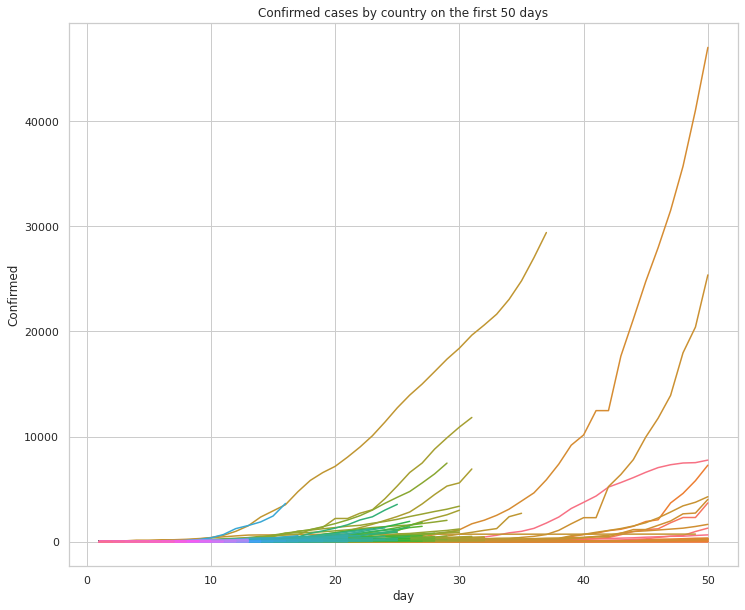

In [4]:
n = 50
first_n_day = case_report_by_counry_from_day1[(case_report_by_counry_from_day1['day']<=n)&(case_report_by_counry_from_day1['Country']!='China')]
plt.figure(figsize=(12, 10))
ax = sns.lineplot(x="day",y="Confirmed",hue="Country",data=first_n_day)
ax.set_title("Confirmed cases by country on the first "+ str(n)+" days")
ax.get_legend().set_visible(False)
plt.show()

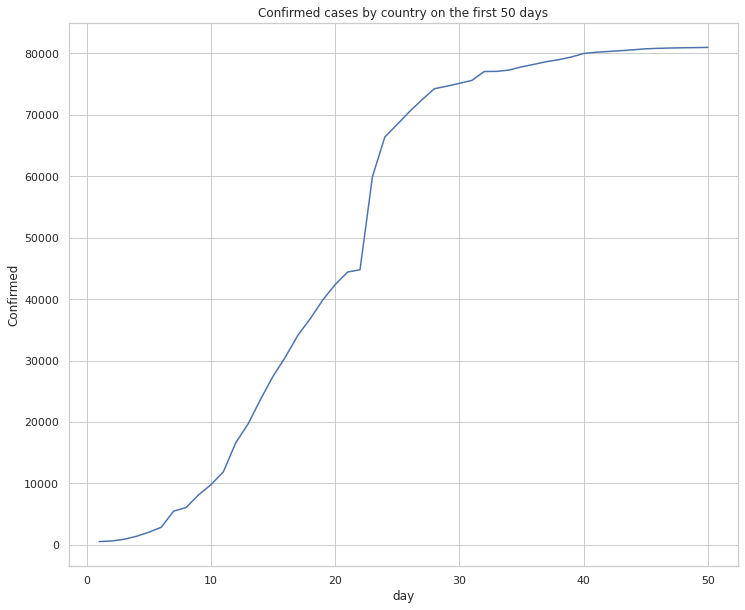

In [5]:
n = 50
country_list = ['China']
first_n_day = case_report_by_counry_from_day1[(case_report_by_counry_from_day1['day']<=n)&(case_report_by_counry_from_day1['Country'].isin(country_list))]
plt.figure(figsize=(12, 10))
ax = sns.lineplot(x="day",y="Confirmed",hue="Country",data=first_n_day)
ax.set_title("Confirmed cases by country on the first "+ str(n)+" days")
ax.get_legend().set_visible(False)
plt.show()

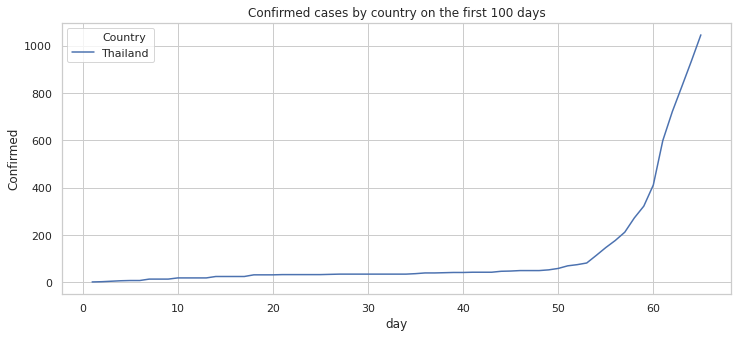

In [6]:
n = 100
country_list = ['Thailand']
first_n_day = case_report_by_counry_from_day1[(case_report_by_counry_from_day1['day']<=n)&(case_report_by_counry_from_day1['Country'].isin(country_list))]
plt.figure(figsize=(12, 5))
ax = sns.lineplot(x="day",y="Confirmed",hue="Country",data=first_n_day)
ax.set_title("Confirmed cases by country on the first "+ str(n)+" days")
plt.show()

### Exponential growth


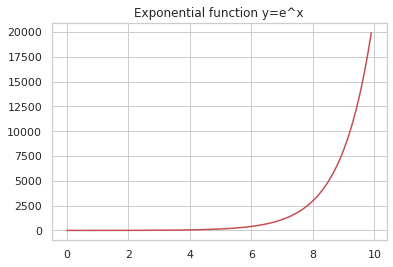

In [7]:
x = np.arange(0,10,0.1)
y = np.exp(x)
plt.plot(x,y,'r')
plt.title('Exponential function y=e^x')
plt.show()

In [0]:
def exponential_model(x,a,b,c):
  return a*np.exp(b*(x-c))

In [0]:
x = np.arange(0,10,0.1)
a_var = np.arange(0,10,2)
b_var = np.arange(0,1.2,0.3)
c_var = np.arange(0,10,2)

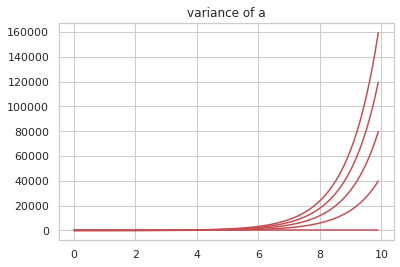

In [185]:
#a determines the amplitude at the same x
for a in a_var:
  y = exponential_model(x,a=a,b=1,c=0)
  plt.plot(x,y,'r')
plt.title('variance of a')
plt.show()

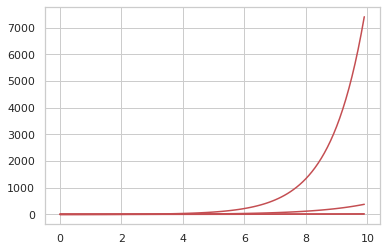

In [186]:
#b determines growth rate
for b in b_var:
  y = exponential_model(x,a=1,b=b,c=0)
  plt.plot(x,y,'r')
plt.show()

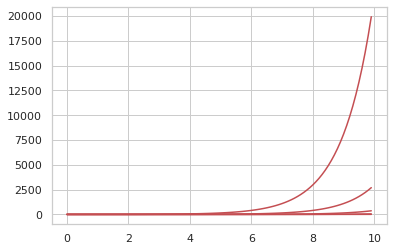

In [187]:
#c shifts graph left or right
for c in c_var:
  y = exponential_model(x,a=1,b=1,c=c)
  plt.plot(x,y,'r')
plt.show()

### Thailand


In [0]:
n = 100
country_list = ['Thailand']
thailand_cases = case_report_by_counry_from_day1[(case_report_by_counry_from_day1['day']<=n)&(case_report_by_counry_from_day1['Country'].isin(country_list))]
x = thailand_cases['day'].to_numpy()
y = thailand_cases['Confirmed'].to_numpy()

In [171]:

exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,-1])
a_pred = exp_fit[0][0]
b_pred = exp_fit[0][1]
c_pred = exp_fit[0][2]
print(exp_fit)
y_pred = exponential_model(x,a=a_pred,b=b_pred,c=c_pred)

(array([0.00597355, 0.18702831, 0.09778769]), array([[ 1.89757287e+03, -7.77746130e-02,  1.69766845e+06],
       [-7.77746126e-02,  3.94206850e-05, -6.95691112e+01],
       [ 1.69766845e+06, -6.95691116e+01,  1.51882345e+09]]))


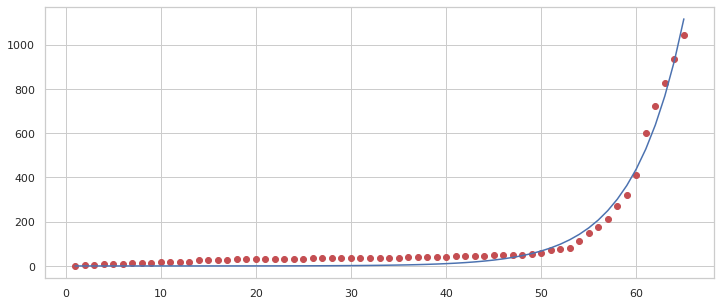

In [139]:
plt.figure(figsize=(12, 5))
plt.scatter(x,y,label="actual confirmed",color="r")
plt.plot(x, y_pred, label="Exponential model" )
plt.show()

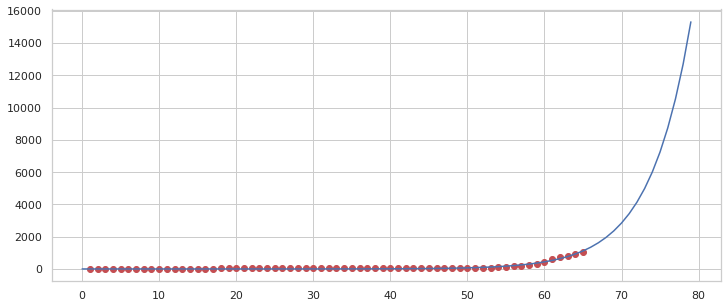

In [142]:
plt.figure(figsize=(12, 5))
x_test = np.arange(0,80)

y_pred = exponential_model(x_test,a_pred,b_pred,c_pred)
plt.scatter(x_train,y_train,label="actual confirmed",color="r")
plt.plot(x_test, y_pred, label="Logistic model" )

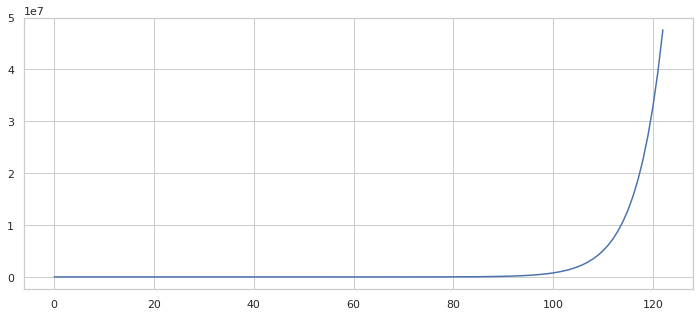

In [16]:
x = np.arange(0,123)
y_pred = exponential_model(x,a=a_pred,b=b_pred,c=c_pred)
plt.figure(figsize=(12, 5))
plt.plot(x, y_pred, label="Exponential model" )
plt.show()

reach 35 million people in 123 days (around 4 months)

## Write a function for reusability

In [0]:
def exponential_model_plot(country,n_train,n_predict,initial_param=[1,1,-1]):
  country_cases = case_report_by_counry_from_day1[(case_report_by_counry_from_day1['day']<=n_train)&(case_report_by_counry_from_day1['Country']==country)]
  x_train = country_cases['day'].to_numpy()
  y_train = country_cases['Confirmed'].to_numpy()

  country_cases = case_report_by_counry_from_day1[(case_report_by_counry_from_day1['day']<=n_predict)&(case_report_by_counry_from_day1['Country']==country)]
  x_actual = country_cases['day'].to_numpy()
  y_actual = country_cases['Confirmed'].to_numpy()

  
  exp_fit = curve_fit(exponential_model,x_train,y_train,p0=initial_param)
  a_pred = exp_fit[0][0]
  b_pred = exp_fit[0][1]
  c_pred = exp_fit[0][2]
  print('a_pred = ' + str(a_pred))
  print('b_pred = ' + str(b_pred))
  print('c_pred = ' + str(c_pred))
  x_pred = np.arange(0,n_predict)
  y_pred = exponential_model(x_pred,a=a_pred,b=b_pred,c=c_pred)

  plt.figure(figsize=(12, 5))
  plt.scatter(x_actual,y_actual,label="actual confirmed",color="r")
  plt.plot(x_pred, y_pred, label="Exponential model of " + country )
  plt.show()

a_pred = 3.6092717996339747
b_pred = 0.1550507430917281
c_pred = -11.347753801767654


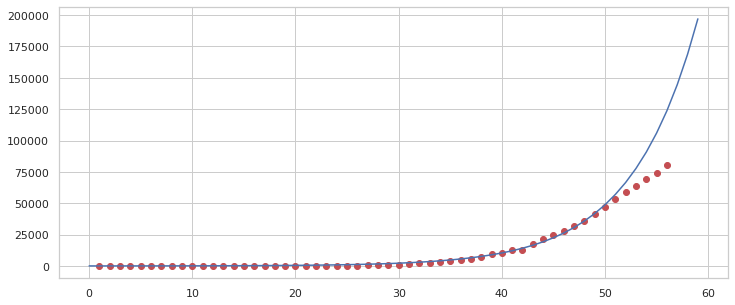

In [198]:
exponential_model_plot(country='Italy',n_train=50,n_predict = 60)

### South Korea

a_pred = 12.976016950865
b_pred = 0.1134610788186254
c_pred = -8.171122404690127


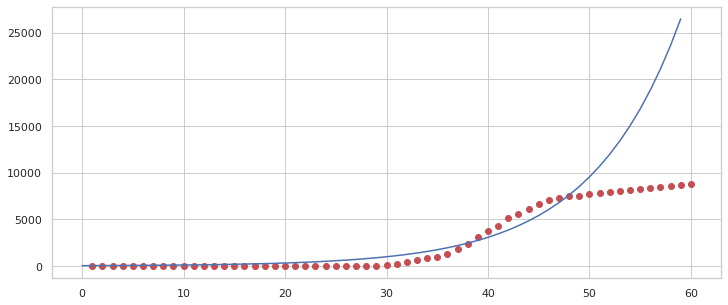

In [199]:
exponential_model_plot(country='Korea, South',n_train=50,n_predict = 60)

### Japan

a_pred = 4.8895784201472186
b_pred = 0.09398420718263376
c_pred = -1.9735131360016167


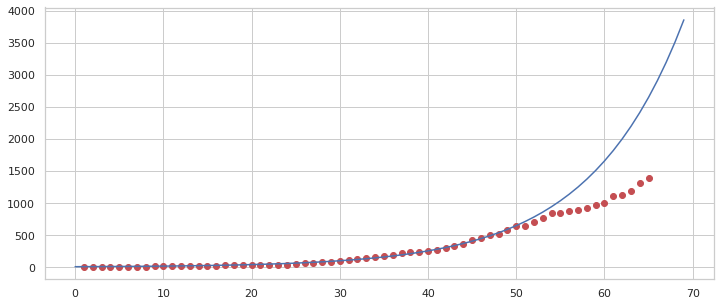

In [202]:
exponential_model_plot(country='Japan',n_train=50,n_predict = 70)

### China

a_pred = 72.45214152229109
b_pred = 0.03215373256993158
c_pred = -176.03488560056516


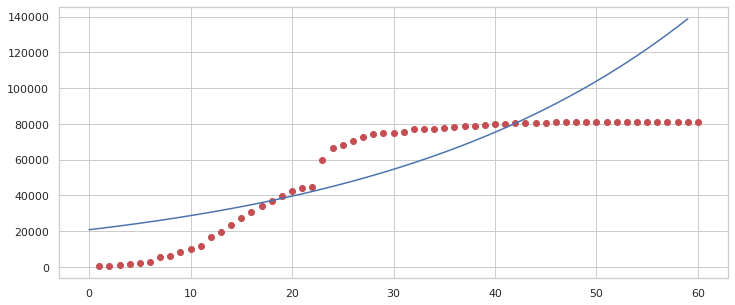

In [203]:
exponential_model_plot(country='China',n_train=50,n_predict = 60)

a_pred = 64.10577653304854
b_pred = 0.14536402024132714
c_pred = -25.502134346845455


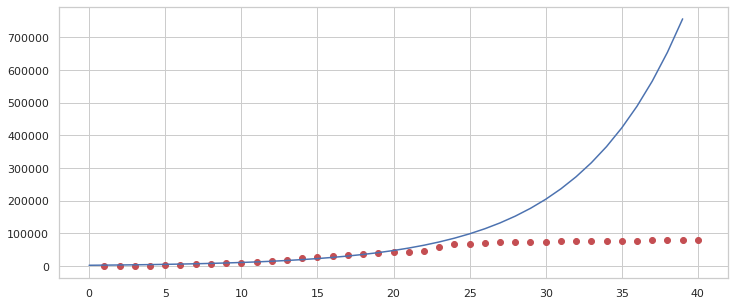

In [204]:
exponential_model_plot(country='China',n_train=20,n_predict = 40,initial_param=(4,0,-1))

### Logistic growth

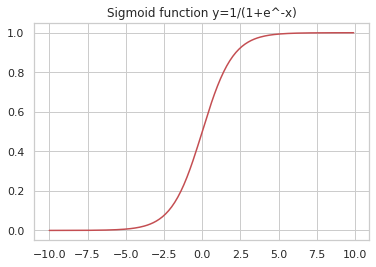

In [25]:
x = np.arange(-10,10,0.1)
y = 1/(1+np.exp(-x))
plt.plot(x,y,'r')
plt.title('Sigmoid function y=1/(1+e^-x)')
plt.show()

In [0]:
def logistic_model(x,a,b,c):
  return a/(1+np.exp(-b*(x-c)))

In [0]:
x = np.arange(-10,10,0.1)
a_var = np.arange(-10,10,2)
b_var = np.arange(-1.2,1.2,0.3)
c_var = np.arange(-10,10,2)

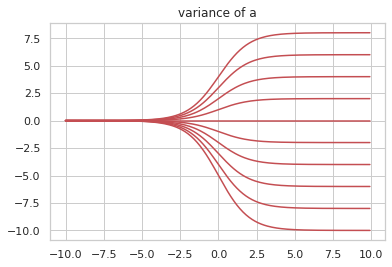

In [104]:
#a defines amplitude i.e. the curve converge to this value
for a in a_var:
  y = logistic_model(x,a=a,b=1,c=0)
  plt.plot(x,y,'r')
plt.title('variance of a')
plt.show()

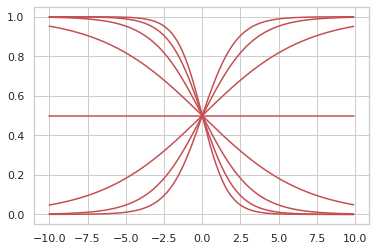

In [105]:
#b defines how fast the growth is
for b in b_var:
  y = logistic_model(x,a=1,b=b,c=0)
  plt.plot(x,y,'r')
plt.show()

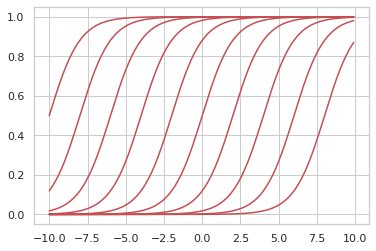

In [107]:
#c shifts curve left or right
for c in c_var:
  y = logistic_model(x,a=1,b=1,c=c)
  plt.plot(x,y,'r')
plt.show()

### Thailand

In [0]:
n = 100
country= 'Thailand'
thailand_cases = case_report_by_counry_from_day1[(case_report_by_counry_from_day1['day']<=n)&(case_report_by_counry_from_day1['Country']==country)]
x_train = thailand_cases['day'].to_numpy()
y_train = thailand_cases['Confirmed'].to_numpy()

In [0]:
logistic_fit = curve_fit(logistic_model,x_train,y_train,p0=[1500,0.5,20])
a_pred = logistic_fit[0][0]
b_pred = logistic_fit[0][1]
c_pred = logistic_fit[0][2]
y_pred = logistic_model(x_train,a=a_pred,b=b_pred,c=c_pred)

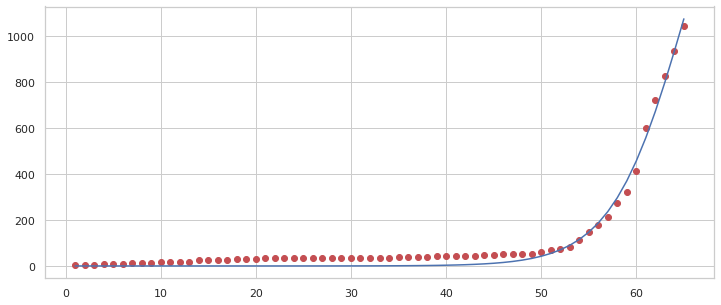

In [131]:
plt.figure(figsize=(12, 5))
plt.scatter(x_train,y_train,label="actual confirmed",color="r")
plt.plot(x_train, y_pred, label="Logistic model" )
plt.show()

In [115]:
logistic_fit

(array([2.18141358e+03, 2.59837865e-01, 6.51155137e+01]),
 array([[ 2.16051838e+05, -9.31400408e+00,  6.99101507e+02],
        [-9.31400408e+00,  4.71619211e-04, -3.09927945e-02],
        [ 6.99101507e+02, -3.09927945e-02,  2.28060804e+00]]))

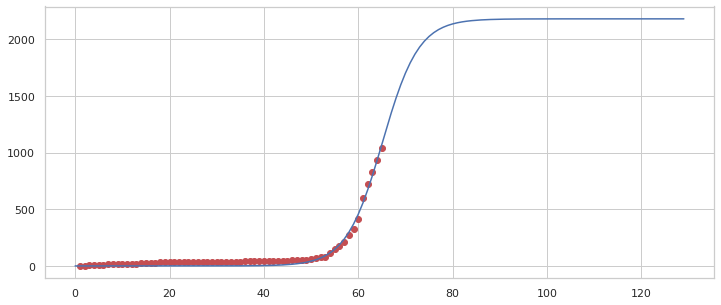

In [136]:
plt.figure(figsize=(12, 5))
x_test = np.arange(0,130)

y_pred = logistic_model(x_test,a_pred,b_pred,c_pred)
plt.scatter(x_train,y_train,label="actual confirmed",color="r")
plt.plot(x_test, y_pred, label="Logistic model" )

### Write a function for reusability

In [0]:
def logistic_model_plot(country,n_train,n_predict):
  country_cases = case_report_by_counry_from_day1[(case_report_by_counry_from_day1['day']<=n_train)&(case_report_by_counry_from_day1['Country']==country)]
  x_train = country_cases['day'].to_numpy()
  y_train = country_cases['Confirmed'].to_numpy()

  country_cases = case_report_by_counry_from_day1[(case_report_by_counry_from_day1['day']<=n_predict)&(case_report_by_counry_from_day1['Country']==country)]
  x_actual = country_cases['day'].to_numpy()
  y_actual = country_cases['Confirmed'].to_numpy()

  initial_param = [1.2*np.max(y_train),0.1,0.1] # init parameter with 1.2 times of current confirmed cases
  logistic_fit = curve_fit(logistic_model,x_train,y_train,p0=initial_param)
  a_pred = logistic_fit[0][0]
  b_pred = logistic_fit[0][1]
  c_pred = logistic_fit[0][2]
  print('a_pred = ' + str(a_pred))
  print('b_pred = ' + str(b_pred))
  print('c_pred = ' + str(c_pred))
  x_pred = np.arange(0,n_predict)
  y_pred = logistic_model(x_pred,a=a_pred,b=b_pred,c=c_pred)

  plt.figure(figsize=(12, 5))
  plt.scatter(x_actual,y_actual,label="actual confirmed",color="r")
  plt.plot(x_pred, y_pred, label="Exponential model of " + country )
  plt.show()

a_pred = 2181.394725495799
b_pred = 0.2598389448278331
c_pred = 65.11544966583405


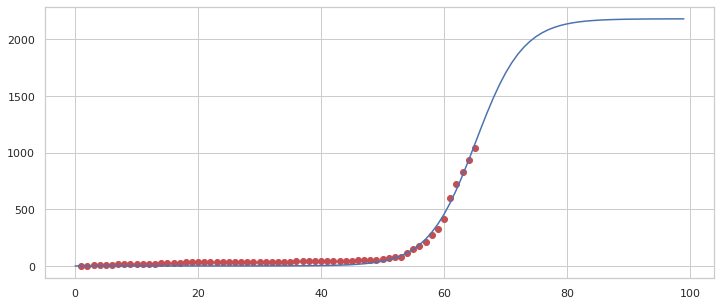

In [229]:
logistic_model_plot(country='Thailand',n_train=100,n_predict = 100)

a_pred = 81067.46666253362
b_pred = 0.2212486889707077
c_pred = 18.780542747235884


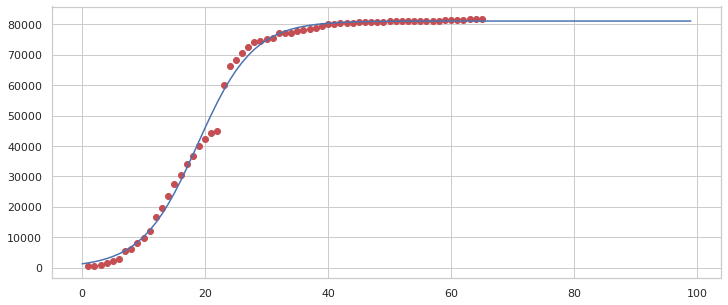

In [223]:
logistic_model_plot(country='China',n_train=100,n_predict = 100)

a_pred = 115177.91281246135
b_pred = 0.19751125673034453
c_pred = 51.84807276622254


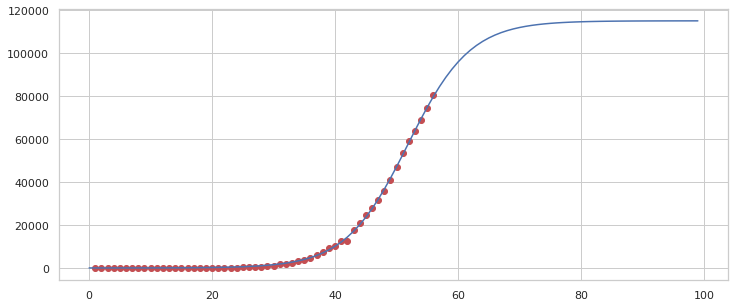

In [230]:
logistic_model_plot(country='Italy',n_train=100,n_predict = 100)

a_pred = 8659.599803649968
b_pred = 0.2966658855288427
c_pred = 41.204148265338084


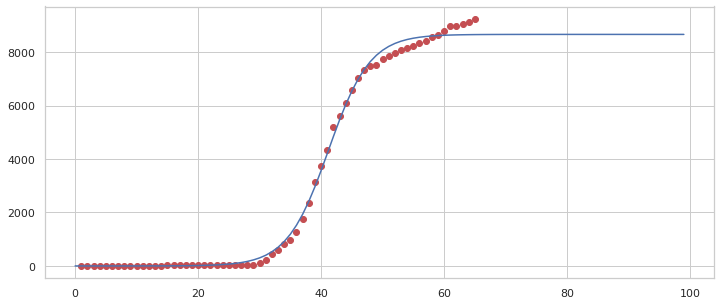

In [231]:
logistic_model_plot(country='Korea, South',n_train=100,n_predict = 100)

a_pred = 1892.906547612922
b_pred = 0.1041329370140275
c_pred = 57.43541488829995


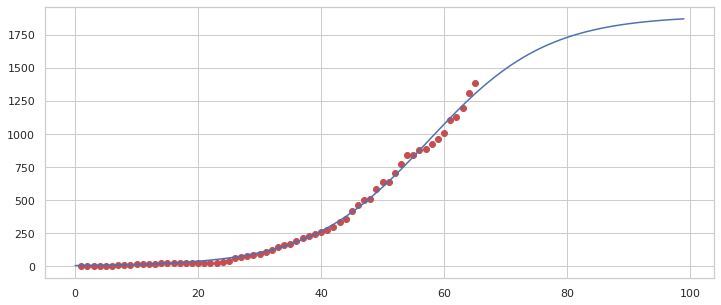

In [232]:
logistic_model_plot(country='Japan',n_train=100,n_predict = 100)

### SIR model

In [0]:
def SIR_model(y,t,beta,gamma):
  S,I,R  = y
  dS_dt = -beta *S * I
  dI_dt = beta * S * I - gamma*I
  dR_dt = gamma * I
  return ([dS_dt,dI_dt,dR_dt])

In [0]:
#initial conditions
S0 = 0.9
I0 = 0.1
R0 = 0.0
beta = 0.35
gamma = 0.1

#Time vector
t= numpy.linspace(0,100,10000)

#Result
solution = scipy.integrate.odeint(SIR_model,[S0,I0,R0],t,args=(beta,gamma))
solution = numpy.array(solution)

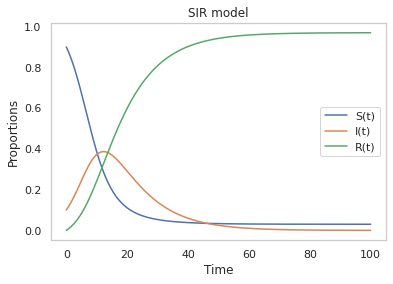

In [23]:
#plot
plt.figure(figsize=[6,4])
plt.plot(t,solution[:,0],label ="S(t)")
plt.plot(t,solution[:,1],label ="I(t)")
plt.plot(t,solution[:,2],label ="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SIR model")
plt.show()